<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Parsa Sharifi
### Student Number : 99101762
### Colab Link:
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [19]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from random import choices
import math
from sklearn.metrics import accuracy_score


## P1: Explore the Dataset

In [2]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-05 21:27:09--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-05 21:27:09--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc93a5945348e0824f1b355f2322.dl.dropboxusercontent.com/cd/0/get/B9YLlmmefKC7TSx87bFV7KYgzFPXsG0aRBrd5nyvE9U_RqWjfSLXqDNp27g_6Nc_MuY4WntDGymP-GTcM6Ip-DbCU4uqnruzxHQqdXjP-_VOmuycCKzK1qKaHVlgAaz58T2RdBQbF0EpbF9Ic2gesOHAVG78dkUspZJIkI84tvt3O_Vf84lDdhnyH7dV3ZyOo-A/file?dl=1# [following]
--2023-06-05 21:27:10--  https://uc93a5945348e0824f1b355f2322.dl.dropboxusercontent.com/cd/0/get/B9YLlmmefKC7TSx87bFV7KYgzFPXsG0aRBrd

Load the dataset as a dataframe

In [3]:
df = pd.read_csv("dataset.csv")

Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [4]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [5]:
df.dropna(inplace=True)

Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

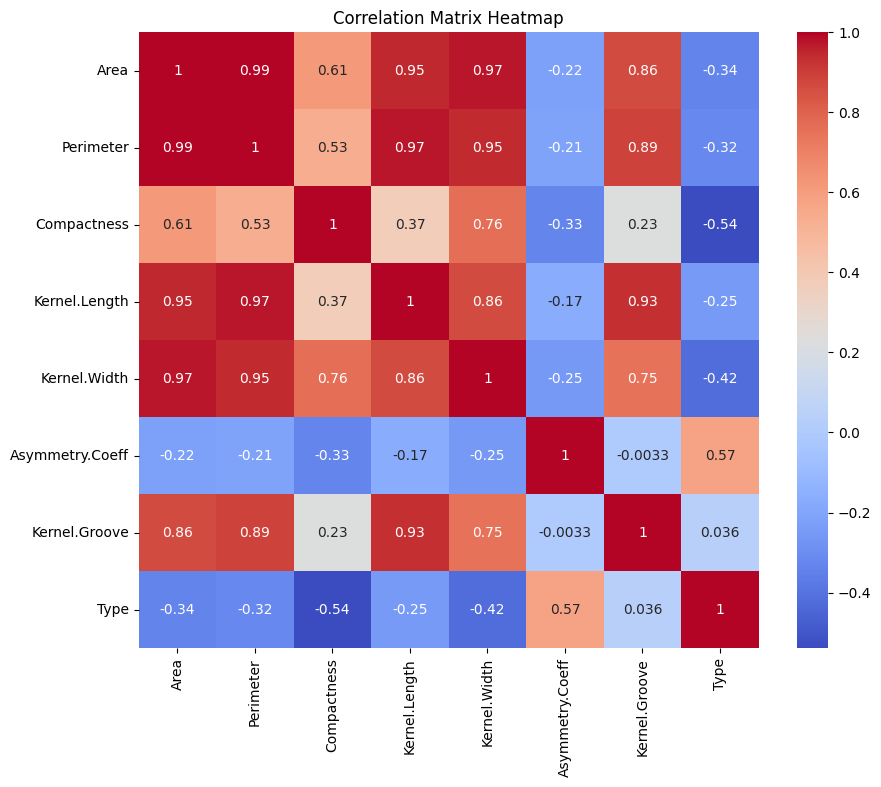

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [8]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
high_corr_features = set()  # To store the features with high correlation

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            feature = corr_matrix.columns[i]
            high_corr_features.add(feature)

# Remove highly correlated features
df.drop(high_corr_features, axis=1, inplace=True)

In [10]:
df.head()

,Area,Compactness,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.8710,2.221,5.220,1
1,14.88,0.8811,1.018,4.956,1
2,14.29,0.9050,2.699,4.825,1
3,13.84,0.8955,2.259,4.805,1
4,16.14,0.9034,1.355,5.175,1


Check for imbalance between classes **(P1-4: 3 points)**

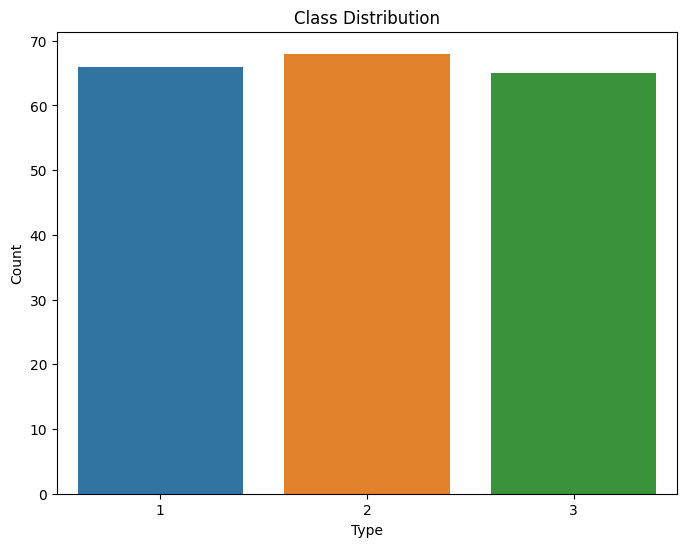

In [11]:
class_counts = df["Type"].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Type")
plt.title("Class Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [12]:
print(class_counts)

2    68
1    66
3    65
Name: Type, dtype: int64


## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [13]:
X = df.drop('Type', axis=1).values
y = df['Type'].values

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [15]:
class DecisionTree:

  def __init__(self, criterion="entropy", max_depth=None):
    """ 
    Parameters:
    criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
    max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
    """
    self.criterion = criterion
    self.max_depth = max_depth
    self.tree = None # The root node of the tree

  def fit(self, X, y):
    """ 
    Build a decision tree classifier from the training set (X, y).
    
    Returns:
    self : Fitted estimator
    """
    # Convert X and y into numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Build the tree recursively
    self.tree = self.build_tree(X, y, 0)

    return self

  def predict(self, X):
    """ 
    Predict class value for X.
    
    Returns:
    y : The predicted classes
    """
    y = []

    # Traverse the tree for each sample in X
    for x in X:
      y.append(self.traverse_tree(x, self.tree))

    return y

  def build_tree(self, X, y, depth):
    """ 
    Build a decision tree recursively.

    Parameters:
    X -- The feature matrix of the current node
    y -- The target vector of the current node
    depth -- The current depth of the tree

    Returns:
    node : A dictionary that represents a node in the tree
    """

    # Get the number of samples and features in the current node
    n_samples, n_features = X.shape

    # Get the unique classes and their counts in the current node
    classes, counts = np.unique(y, return_counts=True)

    # Create a node dictionary
    node = {}

    # Check if the node is pure (only one class) or the maximum depth is reached
    if len(classes) == 1 or depth == self.max_depth:
      # Set the node as a leaf and assign the majority class as the prediction
      node['type'] = 'leaf'
      node['prediction'] = classes[np.argmax(counts)]
      return node

    # Set the node as an internal node and find the best split feature and value
    node['type'] = 'internal'
    
    # Initialize the best information gain (or gini impurity), feature index and value
    best_gain = 0
    best_feature = 0
    best_value = 0

    # Loop through each feature and each unique value in that feature
    for f in range(n_features):
      values = np.unique(X[:,f])
      for v in values:
        # Split the data based on the feature and value
        left_mask = X[:,f] <= v
        right_mask = X[:,f] > v

        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]

        # Calculate the information gain (or gini impurity) of the split
        if self.criterion == 'entropy':
          gain = self.information_gain(y, y_left, y_right)
        elif self.criterion == 'gini':
          gain = self.gini_impurity(y) - self.weighted_gini_impurity(y_left, y_right)

        # Update the best information gain (or gini impurity), feature index and value if needed
        if gain > best_gain:
          best_gain = gain
          best_feature = f
          best_value = v
    
    # Set the best split feature and value for the node
    node['feature'] = best_feature
    node['value'] = best_value

    # Split the data based on the best split feature and value
    left_mask = X[:,best_feature] <= best_value
    right_mask = X[:,best_feature] > best_value

    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]

    # Recursively build the left and right subtrees and assign them to the node
    node['left'] = self.build_tree(X_left, y_left, depth + 1)
    node['right'] = self.build_tree(X_right, y_right, depth + 1)

    return node

  def traverse_tree(self, x, node):
    """ 
    Traverse the tree for a given sample and return the prediction.

    Parameters:
    x -- A single sample
    node -- The current node in the tree

    Returns:
    prediction : The predicted class for the sample
    """

    # Check if the node is a leaf
    if node['type'] == 'leaf':
      # Return the prediction of the node
      return node['prediction']
    
    # Check if the sample value is less than or equal to the split value of the node
    if x[node['feature']] <= node['value']:
      # Traverse the left subtree
      return self.traverse_tree(x, node['left'])
    else:
      # Traverse the right subtree
      return self.traverse_tree(x, node['right'])

  def information_gain(self, y, y_left, y_right):
    """ 
    Calculate the information gain of a split.

    Parameters:
    y -- The target vector of the parent node
    y_left -- The target vector of the left child node
    y_right -- The target vector of the right child node

    Returns:
    gain : The information gain of the split
    """

    # Calculate the entropy of the parent node
    parent_entropy = self.entropy(y)

    # Calculate the entropy of the left child node
    left_entropy = self.entropy(y_left)

    # Calculate the entropy of the right child node
    right_entropy = self.entropy(y_right)

    # Calculate the weighted average entropy of the child nodes
    n = len(y)
    n_left = len(y_left)
    n_right = len(y_right)
    
    weighted_child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy

    # Calculate the information gain of the split
    gain = parent_entropy - weighted_child_entropy

    return gain

  def entropy(self, y):

    """ 
    Calculate the entropy of a target vector.

    Parameters:
    y -- The target vector

    Returns:
    entropy : The entropy of the target vector
    """

     # Get the unique classes and their counts in the target vector
    classes, counts = np.unique(y, return_counts=True)

     # Calculate the probabilities of each class
    probabilities = counts / counts.sum()

     # Calculate the entropy of the target vector
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

  def gini_impurity(self, y):
     """ 
     Calculate the gini impurity of a target vector.

     Parameters:
     y -- The target vector

     Returns:
     gini : The gini impurity of the target vector
     """

     # Get the unique classes and their counts in the target vector
     classes, counts = np.unique(y, return_counts=True)

     # Calculate the probabilities of each class
     probabilities = counts / counts.sum()

     # Calculate the gini impurity of the target vector
     gini = 1 - np.sum(probabilities ** 2)

     return gini

  def weighted_gini_impurity(self, y_left, y_right):
     """ 
     Calculate the weighted average gini impurity of two child nodes.

     Parameters:
     y_left -- The target vector of the left child node
     y_right -- The target vector of the right child node

     Returns:
     weighted_gini : The weighted average gini impurity of two child nodes
     """

     # Calculate the gini impurity of the left child node
     left_gini = self.gini_impurity(y_left)

     # Calculate the gini impurity of the right child node
     right_gini = self.gini_impurity(y_right)

     # Calculate the weighted average gini impurity of two child nodes
     n_left = len(y_left)
     n_right = len(y_right)
     
     weighted_gini = (n_left / (n_left + n_right)) * left_gini + (n_right / (n_left + n_right)) * right_gini

     return weighted_gini



Define two decision trees with two different criteria **(P3-2: 3 points)**

In [16]:
tree1 = DecisionTree(criterion="gini")
tree2 = DecisionTree(criterion="entropy")

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [17]:
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [18]:
y_pred_tree1 = tree1.predict(X_test)
y_pred_tree2 = tree2.predict(X_test)

Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [19]:
depths = [1, 2, 3, 4, 5]
trees = []

for depth in depths:
    tree = DecisionTree(max_depth=depth)
    tree.fit(X_train, y_train)
    trees.append(tree)


Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

In [20]:

# Assuming y_test is the true labels for the test set

# List to store the accuracy scores
accuracy_scores = []

# Evaluate accuracy for each tree
for tree in trees:
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the accuracy scores
for depth, accuracy in zip(depths, accuracy_scores):
    print(f"Accuracy for max_depth={depth}: {accuracy}")


Accuracy for max_depth=1: 0.7
Accuracy for max_depth=2: 0.925
Accuracy for max_depth=3: 0.825
Accuracy for max_depth=4: 0.875
Accuracy for max_depth=5: 0.875


The initial depth is set up from before so we just talk about this part. when we raise the depth we make the model more complex. From the bias and variance tradeoff we know that if we make the model more complex, to a point it gets better accuracy but from a point it starts to get overfitted. The results above show such thing.

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [23]:
from sklearn.utils import resample
from scipy.stats import mode

class BaggingDecisionTree:
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:

        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """
        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers = []

    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.

        Parameters:
        X : training features array
        y : target array

        Returns:
        self : Fitted estimator
        """
        self.classifiers = []
        for _ in range(self.bootstraped_training_num):
            # Create a bootstrap sample
            X_bootstrap, y_bootstrap = resample(X, y, replace=True)
            # Create a decision tree classifier
            classifier = DecisionTree()
            # Fit the classifier on the bootstrap sample
            classifier.fit(X_bootstrap, y_bootstrap)
            # Append the trained classifier to the list of classifiers
            self.classifiers.append(classifier)
        return self

    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array

        Returns:
        y : The predicted classes
        """
        y_pred = []
        for sample in X:
            classifiers_subset = resample(self.classifiers, n_samples=self.predictors_num, replace=False)
            # Make predictions for each classifier
            predictions = [classifier.predict([sample])[0] for classifier in classifiers_subset]##classifiers_subset
            # Select the most common prediction
            majority_vote = mode(predictions)[0][0]
            y_pred.append(majority_vote)
        return y_pred


Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [24]:
bagging_tree = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=50)
bagging_tree.fit(X_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [25]:
bagging_tree2 = BaggingDecisionTree(bootstraped_training_num=50, predictors_num=7)
bagging_tree2.fit(X_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [26]:
y_pred1 = bagging_tree.predict(X_test)
y_pred2 = bagging_tree2.predict(X_test)

<ipython-input-23-154e3102a491>:57: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions)[0][0]
<ipython-input-23-154e3102a491>:57: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(predictions)[0][0]
<ipython-input-23-15

In [27]:
# Calculate accuracy for the first bagging tree
accuracy1 = accuracy_score(y_test, y_pred1)

# Calculate accuracy for the second bagging tree
accuracy2 = accuracy_score(y_test, y_pred2)

print("Accuracy for the first bagging tree:", accuracy1)
print("Accuracy for the second bagging tree:", accuracy2)

Accuracy for the first bagging tree: 0.875
Accuracy for the second bagging tree: 0.825


The second tree has less voters. The firs one has more voters and we can say that because of having more voters, it can find the difference between classes better, specially in the edges, that the second model with less voters has higher probability to make a mistake.

### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

ATTENTION!!!!!:

the code below is for binary adaboost but the dataset is nulticlass.
The multiclass adaboost model is implemented in the nest block of code.

In [44]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=50):
        """
        Parameters:
        base_classifier : The base classifier used for boosting
        n_estimators : The number of estimators (weak classifiers) to train (default=50)
        """
        self.n_estimators = n_estimators
        self.classifiers = []
        self.classifier_weights = []
    
    def fit(self, X, y):
        # Initialize sample weights uniformly
        sample_weights = np.full(len(X), 1 / len(X))
        y = y - 1
        
        for _ in range(self.n_estimators):
            # Train a new classifier using the current sample weights
            classifier = DecisionTreeClassifier(max_depth=1)
            classifier.fit(X, y)
            
            # Make predictions on the training data
            y_pred = classifier.predict(X)
            #print(y_pred)
            
            # Compute weighted error rate
            weighted_error = np.sum(sample_weights[y_pred != y])/np.sum(sample_weights)
            if weighted_error >= 0.5:
             continue
            
            # Calculate classifier weight
            classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
            max_classifier_weight = 20
            classifier_weight = min(classifier_weight, max_classifier_weight)
            
            # Update sample weights
            sample_weights *= np.exp(-classifier_weight * y * y_pred)
            sample_weights /= np.sum(sample_weights)
            
            # Save the classifier and its weight
            self.classifiers.append(classifier)
            self.classifier_weights.append(classifier_weight)
        print(self.classifier_weights)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        
        for classifier, classifier_weight in zip(self.classifiers, self.classifier_weights):
            
            predictions = np.array(classifier.predict(X))
            y_pred += classifier_weight * predictions
        
        # Convert the weighted sum into class labels
        y_pred = np.sign(y_pred)
        y_pred = y_pred + 1        
        return y_pred



Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [45]:
adaboost = AdaBoost(50)
adaboost.fit(X_train, y_train)

[0.318528856954451, 0.2512489866489072, 0.2066640399840513, 0.17521266674516547, 0.15195359361987676, 0.13411244931910335, 0.1200245799009491, 0.10863610133074868, 0.09924979066210057, 0.0913871901464242, 0.08470968151467145, 0.07897122644554708, 0.07398895360536929, 0.06962423142794681, 0.06577012876173584, 0.06234289226544062, 0.05927602119352, 0.05651606400568918, 0.05401958201583455, 0.051750920003849114, 0.049680544970418336, 0.04778379149996894, 0.04603990250407196, 0.04443128749829473, 0.04294294310736499, 0.04156199596348171, 0.04027733893844642, 0.03907933926016021, 0.03795960250719096, 0.03691078041476585, 0.03592641330877662, 0.03500080011634212, 0.03412889049317943, 0.0333061948072913, 0.032528708629741034, 0.03179284908132041, 0.031095400922647173, 0.030433470694083316, 0.029804447539585742, 0.02920596960687566, 0.028635895120862724, 0.028092277390433983, 0.027573343139410435, 0.0270774736578561, 0.02660318835519951, 0.026149130366065036, 0.02571405391644113, 0.02529681320

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [47]:
y_pred = adaboost.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)

In [48]:
accuracy

0.675

ATTENTION!!!!:

the code below is for multiclass daboost.This model trains one classifier per pair of classes, where each classifier tries to separate two classes from each other. This option requires n_classes * (n_classes - 1) / 2 classifiers, which can be computationally expensive for a large number of classes. It also requires a voting scheme to combine the predictions of the different classifiers and assign the final class label.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from scipy.stats import mode
import itertools

class OneVsOneAdaBoost:
    def __init__(self, n_estimators=50):
        """
        Parameters:
        n_estimators : The number of estimators (weak classifiers) to train for each pair of classes (default=50)
        """
        self.n_estimators = n_estimators
        self.classifiers = {} # A dictionary that maps each pair of classes to a list of classifiers
        self.classifier_weights = {} # A dictionary that maps each pair of classes to a list of classifier weights
        
    def fit(self, X, y):
        classes = np.unique(y)
        # Iterate over all pairs of classes
        for class1, class2 in itertools.combinations(classes, 2):
            # Create a subset of the data that contains only the samples of the two classes
            X_subset = X[(y == class1) | (y == class2)]
            y_subset = y[(y == class1) | (y == class2)]
            y_subset = np.where(y_subset == class1, -1, 1)
            sample_weights = np.full(len(X_subset), 1 / len(X_subset))
            classifiers = []
            classifier_weights = []
            for _ in range(self.n_estimators):
                classifier = DecisionTreeClassifier(max_depth=1)
                classifier.fit(X_subset, y_subset, sample_weight=sample_weights)
                
                y_pred = classifier.predict(X_subset)
                
                weighted_error = np.sum(sample_weights[y_pred != y_subset])
                
                # Skip the classifier if the weighted error rate is too high
                if weighted_error >= 0.5:
                    continue
                
                classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)

                # Limit the minimum value of the classifier weight
                min_classifier_weight = 0.01
                classifier_weight = max(classifier_weight, min_classifier_weight)
                max_classifier_weight = 10
                classifier_weight = min(classifier_weight, max_classifier_weight)

                
                # Update sample weights
                sample_weights *= np.exp(-classifier_weight * y_subset * y_pred)
                sample_weights /= np.sum(sample_weights)
                
                # Save the classifier and its weight for this pair of classes
                classifiers.append(classifier)
                classifier_weights.append(classifier_weight)
            
            # Save the list of classifiers and classifier weights for this pair of classes in the dictionaries
            self.classifiers[(class1, class2)] = classifiers
            self.classifier_weights[(class1, class2)] = classifier_weights
        print(classifier_weights)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using majority voting of `self.predictors_num` classifiers.

        Parameters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        n_samples = X.shape[0]
        y_pred = []
        
        for sample in X:
            # Make predictions for each pair of classes using their corresponding classifiers and classifier weights
            predictions = {}
            for (class1, class2), classifiers in self.classifiers.items():
                classifier_weights = self.classifier_weights[(class1, class2)]
                weighted_sum = 0
                for classifier, classifier_weight in zip(classifiers, classifier_weights):
                    prediction = classifier.predict([sample])[0]
                    weighted_sum += classifier_weight * prediction
                prediction = np.sign(weighted_sum)
                prediction = class1 if prediction == -1 else class2
                predictions[prediction] = predictions.get(prediction, 0) + 1
            
            # Select the most frequent class label as the final prediction for this sample
            majority_vote = max(predictions, key=predictions.get)
            y_pred.append(majority_vote)
        
        return y_pred


In [54]:
adaboost = OneVsOneAdaBoost(50)
adaboost.fit(X_train, y_train)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted_error) / weighted_error)
<ipython-input-53-c0df55db32dc>:49: RuntimeWarning: divide by zero encountered in double_scalars
  classifier_weight = 0.5 * np.log((1 - weighted

In [55]:
y_pred = adaboost.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)

In [56]:
accuracy

0.875